In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches


In [15]:
filename = 'extradata/retweetsvsfollowers.csv'
with open(filename) as f:
    content = f.readlines()
    content = [x.strip() for x in content] 

In [16]:
name = []
follower = []
retweets = []
tweetsperday=[]
for line in content:
    name.append(line.split(',')[0])
    follower.append(float(line.split(',')[1]))
    retweets.append(float(line.split(',')[2]))
    tweetsperday.append(float(line.split(',')[3]))

In [17]:
junk = ['medialne','CrowdMedia_PL','dlapolski','Matka_Kurka','MediaNarodoweMN','niezaleznapl','PikioPL','RepublikaTV','wPrawopl','wSensie']
mainstream = ['wgospodarce','KRESYPL','bankier_pl','WiadomosciTVP','FaktyTVN','rzeczpospolita','OnetWiadomosci','Interia_Fakty','RadioZET_NEWS','natematpl']
bigmainstream = ['tvp_info','tvn24','gazeta_wyborcza','gazetapl_news']
factcheck = ['DemagogPL','konkret24','oko_press','demaskator24','AntyFakePL']
val_map = {}
color_map = []
pattern_map = []
# {'orange': 'x', 'lightblue': '//','DodgerBlue': '/', 'greenyellow': '+',}

for node in name:
    if node in junk:
        color_map.append('orange')
        pattern_map.append('x')
    elif node in mainstream:
        color_map.append('lightblue')
        pattern_map.append('/')
    elif node in bigmainstream:
        color_map.append('DodgerBlue')
        pattern_map.append('//')
    elif node in factcheck:
        color_map.append('greenyellow')
        pattern_map.append('+')
    else:
        color_map.append('lightgray')

D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  if sys.path[0] == '':
D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  del sys.path[0]
D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  
D:\Programms\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  from ipykernel import kernelapp as app


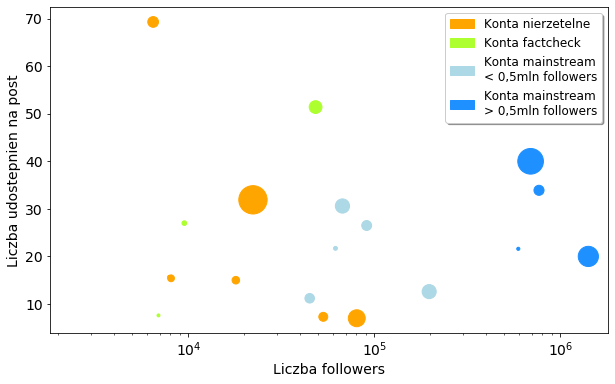

In [43]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize =(10, 6)) 

plt.xscale("log")
plt.xlim(1800, 1800000)
plt.scatter(follower, retweets, color= color_map,s=tweetsperday*2000)

plt.xlabel('Liczba followers')
plt.ylabel('Liczba udostepnien na post')


junk_patch = mpatches.Patch(color='orange', edgecolor='black', label='Konta nierzetelne')
mainstream_patch = mpatches.Patch(color='lightblue', edgecolor='black', label='Konta mainstream\n< 0,5mln followers')
bigmainstream_patch = mpatches.Patch(color='DodgerBlue', edgecolor='black', label='Konta mainstream\n> 0,5mln followers')
factcheck_patch = mpatches.Patch(color='greenyellow', edgecolor='black', label='Konta factcheck')
plt.legend(handles=[junk_patch,  factcheck_patch, mainstream_patch, bigmainstream_patch,],
           fontsize=12,loc='upper right',
          fancybox=True, shadow=True, ncol=1)


# Show graphic
plt.show()

